<a href="https://colab.research.google.com/github/nandahani11/TugasIndividu_Bigdata/blob/master/ProsesEDA_%26__DataProcessing_%26_VisualisasiData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**"Menghitung Perbandingan Jumlah antara TV Show dengan MOVIE pada Netflix berdasarkan Tahun Perilisan".**

Pada tahapan Pengolahan dataset kali ini dilakukan tahapan-tahapan sebagai berikut :
1. Proses EDA (Exloratory Data Analysis)
2. Data Processing
3. Visualisasi Data

sebelum ketahapan pemrosesan data tersebut, perlu dilakukan beberapa installasi pada google colab, diantaranya sebagai berikut:

*   Proses Installasi SPARK pada Google Colab

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
!tar xf spark-2.4.6-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"



*   Import Library yang sudah di Install



In [ ]:
import findspark
findspark.init("spark-2.4.6-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg

In [ ]:
!pip install -q pyspark_dist_explore

In [ ]:
import matplotlib.pyplot as plt
from pyspark_dist_explore import Histogram, hist



*  Inisialisasi SparkContext dan SparkSession



In [ ]:
sc = spark.sparkContext
spark = SparkSession(sc)



*   Load Dataset Netflix Tv Show and Movie



In [ ]:
netflix_df = spark.read.csv("netflix_titles.csv", header=True, inferSchema=True)
netflix_df.printSchema() #mengecek schema dari dataset

root
 |-- show_id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- description: string (nullable = true)



Seperti skema yang terlihat pada data diatas, dataset Netflix TV Show and Movie memiliki 12 kolom. pada pemrosesan data kali ini sesuai dengan judul yang saya ambil yaitu "Menghitung Perbandungan jumlah TV Show dan Movie pada Netflix berdasarkan tahun Perilisan", maka analisa yang saya lakukan terdapat pada kolom TYPE dan RELEASE_YEAR.

**1. Proses EDA (Exploratory Data Analysis)**

In [ ]:
#Mengecek Jumlah seluruh Tayangan TV Show dan Movie pada Dataset
print(" ")
print("Jumlah total Seluruh Tayangan pada Netflix :")
netflix_df.count()

 
Jumlah total Seluruh Tayangan pada Netflix :


6236

In [ ]:
#Mengecek Jumlah Tayangan TV show pada Netflix
print("Jumlah TV Show pada Netflix : ")
print(" ")

netflix_tvshow = netflix_df.filter(netflix_df.type == "TV Show")
netflix_tvshow.count()

Jumlah TV Show pada Netflix : 
 


1969

In [ ]:
#Mengecek Jumlah tayangan Movie pada Netflix
print("Jumlah Movie pada Netflix : ")
print(" ")

netflix_Movie = netflix_df.filter(netflix_df.type == "Movie")
netflix_Movie.count()

Jumlah Movie pada Netflix : 
 


4265

In [ ]:
#statistik dataset netflix tv show and movie
netflix_df.describe().show()

+-------+--------------------+-------------+---------------------------------+--------------------+--------------------+----------------+--------------+-----------------+--------------+-------------+---------------+--------------------+
|summary|             show_id|         type|                            title|            director|                cast|         country|    date_added|     release_year|        rating|     duration|      listed_in|         description|
+-------+--------------------+-------------+---------------------------------+--------------------+--------------------+----------------+--------------+-----------------+--------------+-------------+---------------+--------------------+
|  count|                6236|         6235|                             6234|                4265|                5665|            5758|          6223|             6234|          6224|         6234|           6233|                6233|
|   mean| 7.670367931985883E7|         null|        

In [ ]:
#Mengecek Statistik Data sebelum dilakukan perubahan type data
netflix_df.select('release_year').describe().show()

+-------+-----------------+
|summary|     release_year|
+-------+-----------------+
|  count|             6234|
|   mean|2013.367169932541|
| stddev|8.772251335858451|
|    min|   Francis Weddey|
|    max|           40 min|
+-------+-----------------+



Pada pengecekan data statistik di kolom release_year ini tipe data pada kolom ini masih berupa string sehingga pada data min dan max nya masih belum tepat, oleh karena itu perlu dilakukan perubahan tipe data pada kolom tersebut karena kolom ini akan digunakan pada proses selanjutnya.

**- Melakukan Perubahan Type Data pada kolom Release Year** 


Perubahan tipe data pada kolom release year dari string menjadi integer dilakukan agar data pada kolom tersebut dapat diproses sebagaimana mestinya dan tidak terjadi ke ambiguan pada data. Perubahan yang dilakukan dapat dilihat sebagai berikut :

In [ ]:
#Mengubah type data pada kolom Release Year
from pyspark.sql.types import IntegerType

netflix_df_new = netflix_df.withColumn("release_year", netflix_df["release_year"].cast(IntegerType()))
netflix_df_new.printSchema()
netflix_df_new.select("release_year").show()

root
 |-- show_id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- description: string (nullable = true)

+------------+
|release_year|
+------------+
|        2019|
|        2016|
|        2013|
|        2016|
|        2017|
|        2016|
|        2014|
|        2017|
|        2017|
|        2014|
|        2017|
|        2015|
|        2009|
|        2013|
|        2016|
|        2012|
|        2017|
|        2010|
|        2013|
|        2015|
+------------+
only showing top 20 rows



In [ ]:
#Mengecek Statistik Data Setelah Perubahan type data pada kolom release year
netflix_df_new.select('release_year').describe().show()

+-------+-----------------+
|summary|     release_year|
+-------+-----------------+
|  count|             6226|
|   mean|2013.367169932541|
| stddev|8.772251335858451|
|    min|             1925|
|    max|             2020|
+-------+-----------------+



**- Persebaran Data Pada kolom Release Year**

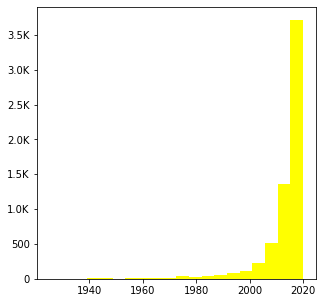

In [ ]:
#Persebaran data pada kolom release_year
netflix_df_new_releaseYear = netflix_df_new.select('release_year')

fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
hist(axes, netflix_df_new_releaseYear, bins=20, color="yellow")
plt.show()

In [ ]:
#Mengecek jumlah nilai null pada kolom release year
print("Jumlah total pada kolom Release Year kosong(null):")
netflix_df_new.where(col("release_year").isNull()).count()

Jumlah total pada kolom Release Year kosong(null):


10

**- PreProcessing Data**

Pre-Processing ini dilakukan untuk melakukan Pengisian data pada data Null yang terdapat pada kolom release year. Hal ini bisa dilakukan dengan beberapa cara, misalnya mengganti nilai null dengan nilai 0, mengganti dengan nilai baris sebelumnya, menggunakan mean (rata-rata), dan lain-lain. Penggantian pada proses kali ini akan menggunakan nilai mean dari kolom tersebut.

In [ ]:
#pengisian kolom Release year yang bernilai Null
mean_releaseYear = netflix_df_new.agg(avg(col("release_year"))).first()
print("rata-rata release_year : ", mean_releaseYear[0])
netflix_df_new = netflix_df_new.na.fill(mean_releaseYear[0], ["release_year"])

rata-rata release_year :  2013.367169932541


In [ ]:
#Mengecek Jumlah Null setelah dilakukan pengisian
print("Jumlah nilai pada kolom release_year kosong(null):")
netflix_df_new.where(col("release_year").isNull()).count()

Jumlah nilai pada kolom release_year kosong(null):


0

In [ ]:
#Mengecek Statistik Data
netflix_df_new.select('release_year').describe().show()

+-------+------------------+
|summary|      release_year|
+-------+------------------+
|  count|              6236|
|   mean|2013.3665811417575|
| stddev| 8.765226142889697|
|    min|              1925|
|    max|              2020|
+-------+------------------+



**2. Data Processing**

Setelah melakukan proses EDA dan Pre-processing data, selanjutnya akan dilakukan pemrosesan data Menggunakan salah satu metode yaitu DataFrame Transformations, Actions dan PySparkSQL.

Pemrosesan yang akan dilakukan yaitu menghitung perbandingan tayangan pada Netflix dataset antara Tv Show dan Movie.

In [ ]:
#Memanggil 10 data pertama yang terdapat pada dataset
netflix_df_new.show(10)

+--------+-------+--------------------+--------------------+--------------------+--------------------+----------+------------+--------+--------+--------------------+--------------------+
| show_id|   type|               title|            director|                cast|             country|date_added|release_year|  rating|duration|           listed_in|         description|
+--------+-------+--------------------+--------------------+--------------------+--------------------+----------+------------+--------+--------+--------------------+--------------------+
|81145628|  Movie|Norm of the North...|Richard Finn, Tim...|Alan Marriott, An...|United States, In...|  9-Sep-19|        2019|   TV-PG|  90 min|Children & Family...|Before planning a...|
|80117401|  Movie|Jandino: Whatever...|                null|    Jandino Asporaat|      United Kingdom|  9-Sep-16|        2016|   TV-MA|  94 min|     Stand-Up Comedy|"Jandino Asporaat...|
|70234439|TV Show|  Transformers Prime|                null|Peter

Menggunakan SparkSQL dalam Pemrosesan

Pada Pemrosesan ini saya menggunakan SparkSQL, Pemrosesan ini dilakukan untuk mengetahui perbandingan antara tayangan TV Show dan Movie.

sebelum menampilkan perbandingannya berikut merupakan data masing-masing tayangan pada netflix:


In [ ]:
#Membuat tabel
netflix_df_new.createOrReplaceTempView("netflix")

#Persebaran data pada Tayangan TV Show pada Netflix
netflix_TVshow = spark.sql("SELECT * FROM netflix WHERE type=='TV Show'")
print("Jumlah tayangan TV Show di Netflix : ", netflix_TVshow.count())
print("Berikut merupakan 10 data pertama pada tayangan TV Show di Netflix :")
netflix_TVshow.show(10)


#Persebaran data pada Tayangan Movie pada Netflix
netflix_Movie = spark.sql("SELECT * FROM netflix WHERE type=='Movie'")
print("Jumlah tayangan Movie di Netflix : ", netflix_Movie.count())
print("Berikut merupakan 10 data pertama pada tayangan Movie di Netflix : ")
netflix_Movie.show(10)

Jumlah tayangan TV Show di Netflix :  1969
Berikut merupakan 10 data pertama pada tayangan TV Show di Netflix :
+--------+-------+--------------------+--------+--------------------+-------------+----------+------------+--------+--------+--------------------+--------------------+
| show_id|   type|               title|director|                cast|      country|date_added|release_year|  rating|duration|           listed_in|         description|
+--------+-------+--------------------+--------+--------------------+-------------+----------+------------+--------+--------+--------------------+--------------------+
|70234439|TV Show|  Transformers Prime|    null|Peter Cullen, Sum...|United States|  8-Sep-18|        2013|TV-Y7-FV|1 Season|            Kids' TV|With the help of ...|
|80058654|TV Show|Transformers: Rob...|    null|Will Friedle, Dar...|United States|  8-Sep-18|        2016|   TV-Y7|1 Season|            Kids' TV|When a prison shi...|
|80163890|TV Show|             Apaches|    null|

In [ ]:
#Tayangan TV Show
data_TVshow = spark.sql("SELECT * FROM netflix WHERE type=='TV Show'")
print("Menampilkan Jumlah tayangan TV Show Pada Netflix :", data_TVshow.count())
print(" ")

#Tayangan Movie
data_Movie = spark.sql("SELECT * FROM netflix WHERE type=='Movie'")
print("Menampilkan Jumlah tayangan Movie Pada Netflix :", data_Movie.count())
print(" ")

#membandingkan data Tv Show dengan Movie
netflix_df_new_Ratio = spark.sql("SELECT type, COUNT(*) AS Total FROM netflix WHERE type=='TV Show' OR type=='Movie' GROUP BY type ORDER BY Total DESC ")
print("Menampilkan Perbandingan Antara tayangan TV Show dengan Movie Pada Netflix :")
netflix_df_new_Ratio.show()

Menampilkan Jumlah tayangan TV Show Pada Netflix : 1969
 
Menampilkan Jumlah tayangan Movie Pada Netflix : 4265
 
Menampilkan Perbandingan Antara tayangan TV Show dengan Movie Pada Netflix :
+-------+-----+
|   type|Total|
+-------+-----+
|  Movie| 4265|
|TV Show| 1969|
+-------+-----+



In [ ]:
#menampilkan sebaran tayangan TV Show  
tvshow_ReleaseYear = spark.sql("SELECT type, release_year, COUNT(*) AS Total FROM netflix WHERE type=='TV Show' GROUP BY release_year, type ORDER BY release_year DESC ")
print("Menampilkan Tayangan TV Show pada Netflix berdasarkan urutan tahun:")
tvshow_ReleaseYear.show(5)

#menampilkan sebaran tayangan Movie 
movie_ReleaseYear = spark.sql("SELECT type, release_year, COUNT(*) AS Total FROM netflix WHERE type=='Movie' GROUP BY release_year, type ORDER BY release_year DESC ")
print("Menampilkan Tayangan Movie pada Netflix berdasarkan urutan Tahun :")
movie_ReleaseYear.show(5)

#menampilkan sebaran tayangan netflix 
netflix_df_new_ReleaseYear = spark.sql("SELECT type, release_year, COUNT(*) AS Total FROM netflix WHERE type=='TV Show' OR type=='Movie' GROUP BY release_year, type ORDER BY release_year DESC ")
print("Menampilkan Tayangan Netflix berdasarkan urutan tahun :")
netflix_df_new_ReleaseYear.show(5)

Menampilkan Tayangan TV Show pada Netflix berdasarkan urutan tahun:
+-------+------------+-----+
|   type|release_year|Total|
+-------+------------+-----+
|TV Show|        2020|   19|
|TV Show|        2019|  442|
|TV Show|        2018|  417|
|TV Show|        2017|  277|
|TV Show|        2016|  237|
+-------+------------+-----+
only showing top 5 rows

Menampilkan Tayangan Movie pada Netflix berdasarkan urutan Tahun :
+-----+------------+-----+
| type|release_year|Total|
+-----+------------+-----+
|Movie|        2020|    6|
|Movie|        2019|  399|
|Movie|        2018|  645|
|Movie|        2017|  681|
|Movie|        2016|  592|
+-----+------------+-----+
only showing top 5 rows

Menampilkan Tayangan Netflix berdasarkan urutan tahun :
+-------+------------+-----+
|   type|release_year|Total|
+-------+------------+-----+
|TV Show|        2020|   19|
|  Movie|        2020|    6|
|TV Show|        2019|  442|
|  Movie|        2019|  399|
|  Movie|        2018|  645|
+-------+------------+-

Melakukan Pemrosesan data pada Tayangan TV Show dan Movie pada beberapa tahun perilisan

pemrosesan ini dilakukan dengan SparkSQL pada beberapa tahun Perilisan untuk melihat spesifikasi perbandingan antara tayangan TV Show dan Movie, diantaranya sebagai berikut:

* Tayangan Netflix Berdasarakan 5 tahun terakhir 



In [171]:
#Tayangan TV Show
data_TVshow2020 = spark.sql("SELECT * FROM netflix WHERE type=='TV Show' AND release_year==2020")
print("Menampilkan Jumlah tayangan TV Show Pada Netflix :", data_TVshow2020.count())
print(" ")

#Tayangan Movie
data_Movie2020 = spark.sql("SELECT * FROM netflix WHERE type=='Movie' AND release_year==2020")
print("Menampilkan Jumlah tayangan Movie Pada Netflix :", data_Movie2020.count())
print(" ")

#Menampilkan jumlah tayangan TV Show dan Movie tahun 2018
netflix_df_new_release2020 = spark.sql("SELECT type, COUNT(*) AS Total FROM netflix WHERE release_year==2020 GROUP BY type ")
print("a. Menampilkan Jumlah perbandingan Tayangan TV Show dan Movie pada tahun perilisan 2020 :")
netflix_df_new_release2020.show()

#Tayangan TV Show
data_TVshow2019 = spark.sql("SELECT * FROM netflix WHERE type=='TV Show' AND release_year==2019")
print("Menampilkan Jumlah tayangan TV Show Pada Netflix :", data_TVshow2019.count())
print(" ")

#Tayangan Movie
data_Movie2019 = spark.sql("SELECT * FROM netflix WHERE type=='Movie' AND release_year==2019")
print("Menampilkan Jumlah tayangan Movie Pada Netflix :", data_Movie2019.count())
print(" ")

#Menampilkan jumlah tayangan TV Show dan Movie tahun 2019
netflix_df_new_release2019 = spark.sql("SELECT type, COUNT(*) AS Total FROM netflix WHERE release_year==2019 GROUP BY type ")
print("b. Menampilkan Jumlah perbandingan Tayangan TV Show dan Movie pada tahun perilisan 2019 :")
netflix_df_new_release2019.show()

#Tayangan TV Show
data_TVshow2018 = spark.sql("SELECT * FROM netflix WHERE type=='TV Show' AND release_year==2018")
print("Menampilkan Jumlah tayangan TV Show Pada Netflix :", data_TVshow2018.count())
print(" ")

#Tayangan Movie
data_Movie2018 = spark.sql("SELECT * FROM netflix WHERE type=='Movie' AND release_year==2018")
print("Menampilkan Jumlah tayangan Movie Pada Netflix :", data_Movie2018.count())
print(" ")

#Menampilkan jumlah tayangan TV Show dan Movie tahun 2018
netflix_df_new_release2018 = spark.sql("SELECT type, COUNT(*) AS Total FROM netflix WHERE release_year==2018 GROUP BY type ")
print("c. Menampilkan Jumlah perbandingan Tayangan TV Show dan Movie pada tahun perilisan 2018 :")
netflix_df_new_release2018.show()

#Tayangan TV Show
data_TVshow2017 = spark.sql("SELECT * FROM netflix WHERE type=='TV Show' AND release_year==2017")
print("Menampilkan Jumlah tayangan TV Show Pada Netflix :", data_TVshow2017.count())
print(" ")

#Tayangan Movie
data_Movie2017 = spark.sql("SELECT * FROM netflix WHERE type=='Movie' AND release_year==2017")
print("Menampilkan Jumlah tayangan Movie Pada Netflix :", data_Movie2017.count())
print(" ")

#Menampilkan jumlah tayangan TV Show dan Movie tahun 2017
netflix_df_new_release2017 = spark.sql("SELECT type, COUNT(*) AS Total FROM netflix WHERE release_year==2017 GROUP BY type ")
print("d. Menampilkan Jumlah perbandingan Tayangan TV Show dan Movie pada tahun perilisan 2017 :")
netflix_df_new_release2017.show()

#Tayangan TV Show
data_TVshow2016 = spark.sql("SELECT * FROM netflix WHERE type=='TV Show' AND release_year==2016")
print("Menampilkan Jumlah tayangan TV Show Pada Netflix :", data_TVshow2016.count())
print(" ")

#Tayangan Movie
data_Movie2016 = spark.sql("SELECT * FROM netflix WHERE type=='Movie' AND release_year==2016")
print("Menampilkan Jumlah tayangan Movie Pada Netflix :", data_Movie2016.count())
print(" ")

#Menampilkan jumlah tayangan TV Show dan Movie tahun 2016
netflix_df_new_release2016 = spark.sql("SELECT type, COUNT(*) AS Total FROM netflix WHERE release_year==2016 GROUP BY type ")
print("e. Menampilkan Jumlah perbandingan Tayangan TV Show dan Movie pada tahun perilisan 2016 :")
netflix_df_new_release2016.show()

Menampilkan Jumlah tayangan TV Show Pada Netflix : 19
 
Menampilkan Jumlah tayangan Movie Pada Netflix : 6
 
a. Menampilkan Jumlah perbandingan Tayangan TV Show dan Movie pada tahun perilisan 2020 :
+-------+-----+
|   type|Total|
+-------+-----+
|TV Show|   19|
|  Movie|    6|
+-------+-----+

Menampilkan Jumlah tayangan TV Show Pada Netflix : 442
 
Menampilkan Jumlah tayangan Movie Pada Netflix : 399
 
b. Menampilkan Jumlah perbandingan Tayangan TV Show dan Movie pada tahun perilisan 2019 :
+-------+-----+
|   type|Total|
+-------+-----+
|TV Show|  442|
|  Movie|  399|
+-------+-----+

Menampilkan Jumlah tayangan TV Show Pada Netflix : 417
 
Menampilkan Jumlah tayangan Movie Pada Netflix : 645
 
c. Menampilkan Jumlah perbandingan Tayangan TV Show dan Movie pada tahun perilisan 2018 :
+-------+-----+
|   type|Total|
+-------+-----+
|TV Show|  417|
|  Movie|  645|
+-------+-----+

Menampilkan Jumlah tayangan TV Show Pada Netflix : 277
 
Menampilkan Jumlah tayangan Movie Pada Netflix : 

pada pemrosesan data diatas untuk mengetahui perbandingan antara jumlah TV show dan Movie pada 5 tahun terakhir.

**3. Visualisasi Data**

Berikut ini merupakan tahapan terakhir dari pengolahan data yang saya lakukan yaitu berupa memberikan gambaran Visual menggunakan grafik untuk menggambarkan perbandingan jumlah tayangan TV Show dan Movie berdasarkan tahun perilisan pada Netflix.

Text(0, 0.5, 'Jumlah Tayangan')

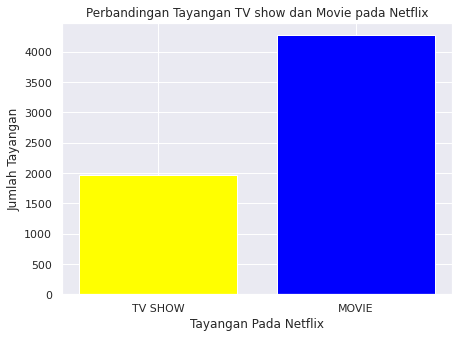

In [ ]:
#grafik bar perbandingan jumlah seluruh tayangan TV Show dan Movie
fig, axes = plt.subplots()

fig.set_size_inches(7, 5)
plt.title('Perbandingan Tayangan TV show dan Movie pada Netflix')
plt.bar('TV SHOW', data_TVshow.count(), color='yellow')
plt.bar('MOVIE', data_Movie.count(), color='blue')
plt.xlabel('Tayangan Pada Netflix')
plt.ylabel('Jumlah Tayangan')

pada grafik diatas merupakan visualisasi dari perbandingan jumlah tayangan Tv show dan Movie pada netflix secara keseluruhan dari tahun 1925 sampai tahun 2020. dapat kita lihat bahwasanya secara keseluruhan pengguna lebih banyak mengakses tayangan Movie pada Netflix dibandingkan dengan acara TV Show.

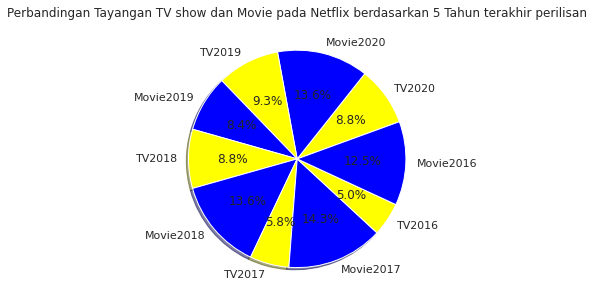

In [ ]:
#Grafik pie perbandingan Tayangan TV show dan Movie berdasarkan 5 tahun terakhir perilisan
fig, axes = plt.subplots()

fig.set_size_inches(10, 5)
plt.title('Perbandingan Tayangan TV show dan Movie pada Netflix berdasarkan 5 Tahun terakhir perilisan')
plt.pie([data_TVshow2018.count(), data_Movie2018.count(), data_TVshow2019.count(), data_Movie2019.count(), data_TVshow2018.count(), data_Movie2018.count(), data_TVshow2017.count(), data_Movie2017.count(), data_TVshow2016.count(), data_Movie2016.count()], labels=['TV2020', 'Movie2020','TV2019', 'Movie2019','TV2018', 'Movie2018', 'TV2017', 'Movie2017', 'TV2016', 'Movie2016',], autopct='%1.1f%%', shadow=True, labeldistance=1.1, startangle=20, colors=['yellow', 'blue'])
print('\n')

pada visualisai ini menggunakan Pie Chart atau grafik pie untuk memberikan gambaran mengenai jumlah tayangan TV Show dan Movie pada 5 tahun terakhir ini. dimana warna kuning merupakan TV Show dan warna biru merupakan Movie.

<BarContainer object of 1 artists>

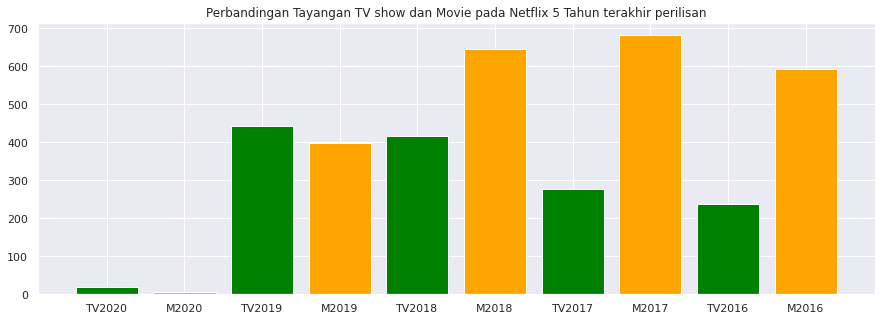

In [164]:
#Grafik bar perbandingan Tayangan TV show dan Movie berdasarkan 5 tahun terakhir perilisan
fig, axes = plt.subplots()

fig.set_size_inches(15, 5)
plt.title('Perbandingan Tayangan TV show dan Movie pada Netflix 5 Tahun terakhir perilisan')
plt.bar('TV2020', data_TVshow2020.count(), color='green' )
plt.bar('M2020', data_Movie2020.count(), color='orange' )
plt.bar('TV2019', data_TVshow2019.count(), color='green' )
plt.bar('M2019', data_Movie2019.count(), color='orange' )
plt.bar('TV2018', data_TVshow2018.count(), color='green' )
plt.bar('M2018', data_Movie2018.count(), color='orange' )
plt.bar('TV2017', data_TVshow2017.count(), color='green' )
plt.bar('M2017', data_Movie2017.count(), color='orange' )
plt.bar('TV2016', data_TVshow2016.count(), color='green' )
plt.bar('M2016', data_Movie2016.count(), color='orange')


pada visualisai ini menggunakan bar Chart atau grafik batang untuk memberikan gambaran mengenai jumlah tayangan TV Show dan Movie pada 5 tahun terakhir ini. sama seperti pie chart diatas, dengan menggunakan Bar Chart ini lebih mudah dibaca perbandingannya daripada menggunakan yang pie chart. dimana bar warna hijau merupakan TV Show dan bar warna oren merupakan Movie.

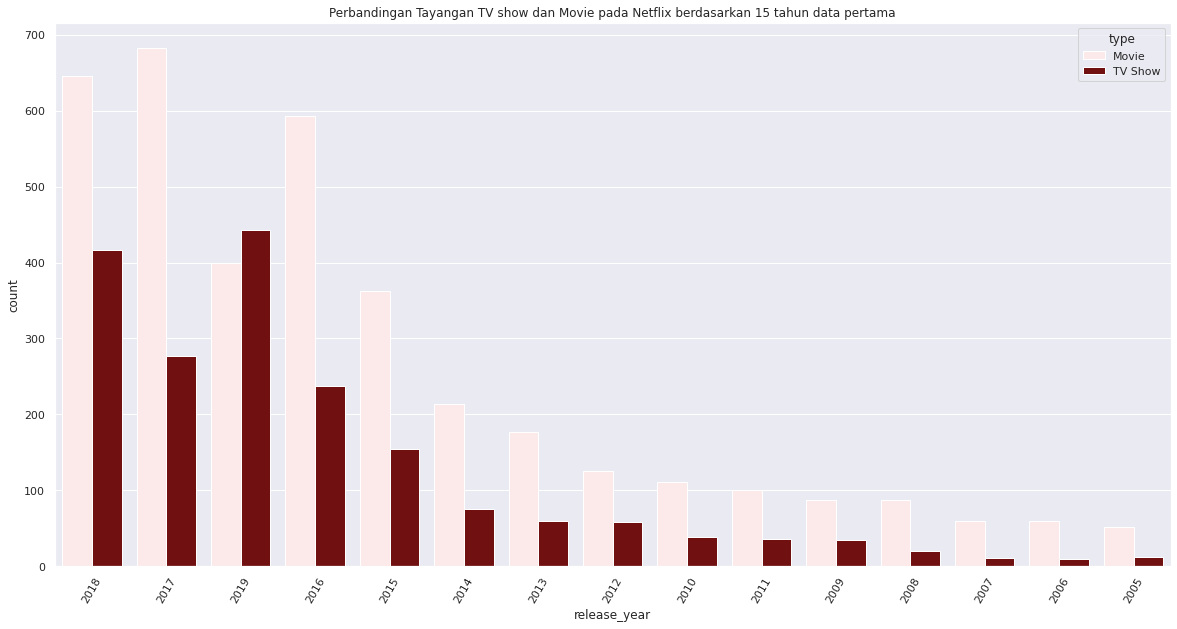

In [179]:
#grafik bar 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set()
plt.figure(figsize=(20,10))
plt.title('Perbandingan Tayangan TV show dan Movie pada Netflix berdasarkan 15 tahun data pertama')
sns.countplot(x="release_year",data= netflix,hue= "type",order = netflix['release_year'].value_counts().index[0:15], color='maroon')
plt.xticks(rotation=60)
plt.show()

pada visualisai data diatas ini menggunakan gabungan visualisasi matplotlib dengan seaborn, untuk dapat memanggil data secara countplot. dapat dilihat bahwasanya 15 tahun data pertama pada dataset tersebut menampilkan perbedaan perbandingan tayangan pada TV show dan Movie secara jelas dari tahun ketahunnya, dimana dapat kita lihat pada bar yang berwarna merah muda tersebut yang merupakan Movie penayangannya selalu lebih banyak dibandingkan dengan TV Show yang di representasikan dengan bar berwarna merah maroon tersebut.